# DO NOT RUN ON GOOGLE COLAB --> IT WON'T WORK BECAUSE IT REQUIRES MORE GIGA THAN THE GOOGLE COLAB RAM CAN HANDLE

In [ ]:
pip install mistralai.client

ERROR: Could not find a version that satisfies the requirement mistralai.client (from versions: none)
ERROR: No matching distribution found for mistralai.client


In [6]:
pip install -r requirements.txt

  Using cached mistralai-0.1.8-py3-none-any.whl.metadata (1.8 kB)
     ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/10.9 MB 1.3 MB/s eta 0:00:09
     --- ------------------------------------ 0.8/10.9 MB 8.7 MB/s eta 0:00:02
     --- ------------------------------------ 1.0/10.9 MB 9.5 MB/s eta 0:00:02
     --- ------------------------------------ 1.0/10.9 MB 9.5 MB/s eta 0:00:02
     ----- ---------------------------------- 1.6/10.9 MB 6.6 MB/s eta 0:00:02
     ------- -------------------------------- 2.1/10.9 MB 8.3 MB/s eta 0:00:02
     ------- -------------------------------- 2.1/10.9 MB 8.3 MB/s eta 0:00:02
     --------- ------------------------------ 2.5/10.9 MB 6.7 MB/s eta 0:00:02
     ----------- ---------------------------- 3.1/10.9 MB 7.7 MB/s eta 0:00:02
     ----------- ---------------------------- 3.1/10.9 MB 7.7 MB/s eta 0:00:02
     ------------- -------------------------- 3.6/10.9 MB 6.9 MB/s eta 0

  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [33 lines of output]
      Traceback (most recent call last):
        File "c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
          main()
        File "c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 112, in get_requires_for_build_wheel
          backend = _build_backend()
                    ^^^^^^^^^^^^^^^^
        File "c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\si

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
import os
from mistralai.client import MistralClient
from mistralai.models.chat_completion import ChatMessage
from requests_html import HTMLSession, AsyncHTMLSession
import asyncio
from newspaper import Article

## Read comments data from IG and sentiment them
The data is then saved in ig_comments_sentiment.csv you can just start from the next section with the data ready for the analysis.

Import comments on specific posts. CSV files have been gathered through https://exportcomments.com/

In [5]:
ig_comments_27_09_23 = pd.read_csv('./IG_comments/ferragni 27-09.csv', delimiter=',')
ig_comments_25_10_23 = pd.read_csv('./IG_comments/ferragni 25-10.csv', delimiter=',')
ig_comments_18_11_23 = pd.read_csv('./IG_comments/ferragni 18-11.csv', delimiter=',')
ig_comments_06_12_23 = pd.read_csv('./IG_comments/ferragni 06-12.csv', delimiter=',')
ig_comments_14_12_23 = pd.read_csv('./IG_comments/ferragni 14-12.csv', delimiter=',')
ig_comments_video_18_12_23 = pd.read_csv('./IG_comments/video_ferragni 18-12.csv', delimiter=',')
ig_comments_04_03_24 = pd.read_csv('./IG_comments/ferragni 04-03.csv', delimiter=',')
ig_comments_17_03_24 = pd.read_csv('./IG_comments/ferragni 17-03.csv', delimiter=',')
ig_comments_23_03_24 = pd.read_csv('./IG_comments/ferragni 23-03.csv', delimiter=',')

FileNotFoundError: [Errno 2] No such file or directory: './IG_comments/ferragni 27-09.csv'

In [ ]:
dataframes = [ig_comments_27_09_23, ig_comments_25_10_23, ig_comments_18_11_23,
              ig_comments_06_12_23, ig_comments_14_12_23, ig_comments_video_18_12_23,
              ig_comments_04_03_24, ig_comments_17_03_24, ig_comments_23_03_24]
dataframe_names = ['ig_comments_27_09_23', 'ig_comments_25_10_23', 'ig_comments_18_11_23',
                   'ig_comments_06_12_23', 'ig_comments_14_12_23', 'ig_comments_video_18_12_23',
                   'ig_comments_04_03_24', 'ig_comments_17_03_24', 'ig_comments_23_03_24']

# Delete rows with @ in the comment (usually they are nested comments, not relevant for the analysis)
for i, df in enumerate(dataframes):
    before_count = len(df)
    df_filtered = df[~df['Comment'].str.contains('@', na=False)]
    after_count = len(df_filtered)
    print(f"{dataframe_names[i]}: before = {before_count}, after = {after_count}")
    dataframes[i] = df_filtered

ig_comments_27_09_23: before = 100, after = 83
ig_comments_25_10_23: before = 100, after = 80
ig_comments_18_11_23: before = 100, after = 62
ig_comments_06_12_23: before = 100, after = 56
ig_comments_14_12_23: before = 100, after = 49
ig_comments_video_18_12_23: before = 100, after = 63
ig_comments_04_03_24: before = 100, after = 81
ig_comments_17_03_24: before = 100, after = 69
ig_comments_23_03_24: before = 100, after = 84


In [ ]:
dates = ['2023-09-27', '2023-10-25', '2023-11-18', '2023-12-06', '2023-12-14', '2023-12-18', '2024-03-04', '2024-03-17', '2024-03-23']

# Add a date_of_post column to each DataFrame based on its corresponding date
for df, date in zip(dataframes, dates):
    df['date_of_post'] = pd.to_datetime(date)

# Concatenate all DataFrames into one, ensuring the new DataFrame has just the 'date_of_post' and 'Comment' columns
ig_comments = pd.concat(dataframes)[['date_of_post', 'Comment']]

# sample few comments
ig_comments.sample(5)

C:\Users\andre\AppData\Local\Temp\ipykernel_11240\2079996390.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_of_post'] = pd.to_datetime(date)
C:\Users\andre\AppData\Local\Temp\ipykernel_11240\2079996390.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_of_post'] = pd.to_datetime(date)
C:\Users\andre\AppData\Local\Temp\ipykernel_11240\2079996390.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

,date_of_post,Comment
8,2024-03-17,Bellissimi Che Bello Vedervi Felici ..... Nel...
0,2024-03-17,Senza fedez..nn è la stessa cosa..😂
57,2024-03-04,"Forza Chiara, vai avanti, sei una ragazza in g..."
2,2023-10-25,Have a great day
42,2024-03-04,"Brava chiara , ti Amiamo❤️"


## Sentiment analysis with Mistral API

In [ ]:
# creating a variable with our API key in order to authenticate and access Mistral's services and defining the type of Mistral's model to use

api_key = "XNjiqIP1IeZxKfbtXckwD5duNvCMyfyZ"
model = "open-mixtral-8x7b"

client = MistralClient(api_key=api_key)

# defining a system message as an initial guide to the API outlining the task of sentiment calssification
system_message = ChatMessage(role="system", content="Classify the sentiment of the following Instagram comments as 'Positive', 'Neutral', or 'Negative'.")

# formulating a unique promt for each comment that directs the model to classify sentiment
prompt_format = "Classify the content of this Instagram comment, replying only with 'Positive', 'Neutral', or 'Negative': {}"
messages = [system_message] + [ChatMessage(role="user", content=prompt_format.format(comment)) for comment in ig_comments['Comment']]

# performing sentiment analysis
sentiments = []
for message in messages:
    try:
        response = client.chat(model=model, messages=[message])
        sentiment = response.choices[0].message.content  # Assuming each response has one sentiment
        sentiments.append(sentiment)
    except Exception as e:
        print(f"An error occurred with message '{message.content}': {e}")
        sentiments.append("Error")

INSTAGRAM CONFIGURATION

In [ ]:
simplified_sentiments = []
for sentiment in sentiments[1:]: #(skipping the first element because it's the system message)
# if the sentiment contains the word "positive", the string "Positive" will be appended to the "simplified_sentiments" variable initiated at the beginning of the code
# same thing for "negative" and "neutral"
    if 'positive' in sentiment.lower():
        simplified_sentiments.append('Positive')
        pass
    elif 'negative' in sentiment.lower():
        simplified_sentiments.append('Negative')
        pass
    else:

        simplified_sentiments.append('Neutral')

simplified_sentiments[:5]

['Positive', 'Positive', 'Positive', 'Positive', 'Positive']

In [ ]:
# creating a column with the sentiments related to each comment
ig_comments['sentiment'] = simplified_sentiments

In [ ]:
# loading the instagram csv with the sentiment
'''ig_comments.to_csv('./IG_comments/ig_comments_sentiment.csv', index=False)'''

### Reload data on comments and sentiments on instagram posts

In [ ]:
# looking at the dataset and dropping NaNs
ig_comments = pd.read_csv('./IG_comments/ig_comments_sentiment.csv')
print(len(ig_comments))
ig_comments = ig_comments.dropna()
print(len(ig_comments))
ig_comments.head()

627
623


,date_of_post,Comment,sentiment
0,2023-09-27,💙💖,Positive
1,2023-09-27,❤️,Positive
2,2023-09-27,💖,Positive
3,2023-09-27,😍❤️😍❤️ che amori,Positive
4,2023-09-27,Sono due teneroni😍😍,Positive


In [ ]:
sample_comments = ig_comments.sample(10)

pd.set_option('display.max_colwidth', 120)
sample_comments

,date_of_post,Comment,sentiment
247,2023-12-06,❤️❤️,Positive
11,2023-09-27,😍,Positive
492,2024-03-17,❤️❤️❤️❤️❤️❤️,Positive
591,2024-03-23,Auguri ❤️,Positive
53,2023-09-27,E una bella famiglia,Positive
272,2023-12-06,Certo che l'invidia assurdo la cattiveria che vedo,Negative
548,2024-03-23,❤️❤️❤️❤️buon compleanno piccola🎂🥳🥳🥳🥳😘,Positive
277,2023-12-06,giax.photography Buon Natale Fedex Mio figlio quest'anno mi ha fatto un regalo inaspettato: mi ha fatto ascoltare la...,Positive
144,2023-10-25,😍😍😍😍😍😍😍😍😍,Positive
342,2023-12-18,"Os seguía por los niños, me encantabais como familia. Siento decepción total total y por eso dejo de seguiros, aprov...",Negative


In [ ]:
# aesthetical modifications to the dataset
# assigning colors to the "Positive", "Negative" and "Neutral" and restyling the Dataframe
def color_sentiment(val):
    """
    Colors 'Positive' green and 'Negative' red.
    """
    color = 'red' if val == 'Negative' else 'green' if val == 'Positive' else 'gray'
    return f'color: {color}'

sample_comments = ig_comments.loc[[165,43,288,99,609,156,342,144,200,412]]
sample_comments = sample_comments.style.set_properties(**{'text-align': 'center'}).set_table_styles([dict(selector='th', props=[('text-align', 'center')])]).applymap(color_sentiment, subset=['sentiment'])

sample_comments

C:\Users\andre\AppData\Local\Temp\ipykernel_11240\3877762156.py:11: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  sample_comments = sample_comments.style.set_properties(**{'text-align': 'center'}).set_table_styles([dict(selector='th', props=[('text-align', 'center')])]).applymap(color_sentiment, subset=['sentiment'])


,date_of_post,Comment,sentiment
165,2023-11-18,❤️❤️❤️❤️,Positive
43,2023-09-27,Leo es un niño especial ❤️,Positive
288,2023-12-14,E sti CA....I della bambina dolcissima?? Che I suoi non si possono toccare ma lei lucra su quelli degli altri?? Troppo comodo .. me ne strafrego della figlia,Negative
99,2023-10-25,Semplicemente meravigliose,Positive
609,2024-03-23,Io vorrei vedere quanti genitori modello ci sono qui che hanno da insegnare agli altri....mah,Neutral
156,2023-10-25,Quanto siete belle 😍,Positive
342,2023-12-18,"Os seguía por los niños, me encantabais como familia. Siento decepción total total y por eso dejo de seguiros, aprovecharos de niños enfermos... Bloqueais los comentarios, no hace falta decir nada más",Negative
144,2023-10-25,😍😍😍😍😍😍😍😍😍,Positive
200,2023-11-18,Wow,Positive
412,2024-03-04,Mi dispiace perché sembravi una brava persona..ora non riesci più a parlare senza i tuoi esperti suggeritori..fraintesa? Chiudiamola qui. Sei figlia dei soldi e il tuo valore sarà sempre in rapporto a quelli.,Negative


## Sentiment over time on Instagram posts

In [ ]:
# aggregating sentiment on Instagram posts, aggregating them by date (from September 2023 till March 2024) and determining
# the percentage distribution of negative, positive and neutral sentiments for each date
grouped = ig_comments.groupby(['date_of_post', 'sentiment']).size().reset_index(name='count')

posts_sentiment = grouped.pivot(index='date_of_post', columns='sentiment', values='count').reset_index()
posts_sentiment = posts_sentiment.astype({'Positive': 'int', 'Neutral': 'int', 'Negative': 'int'})

posts_sentiment['Total'] = posts_sentiment[['Negative', 'Neutral', 'Positive']].sum(axis=1)

posts_sentiment['Negative'] = (posts_sentiment['Negative'] / posts_sentiment['Total']) * 100
posts_sentiment['Neutral'] = (posts_sentiment['Neutral'] / posts_sentiment['Total']) * 100
posts_sentiment['Positive'] = (posts_sentiment['Positive'] / posts_sentiment['Total']) * 100

posts_sentiment.drop(columns=['Total'], inplace=True)
posts_sentiment = posts_sentiment[posts_sentiment['date_of_post'] != '2023-12-06']

posts_sentiment

sentiment,date_of_post,Negative,Neutral,Positive
0,2023-09-27,4.819277,2.409639,92.771084
1,2023-10-25,5.063291,7.594937,87.341772
2,2023-11-18,16.129032,1.612903,82.258065
4,2023-12-14,44.897959,4.081633,51.020408
5,2023-12-18,30.645161,6.451613,62.903226
6,2024-03-04,11.111111,8.641975,80.246914
7,2024-03-17,20.289855,7.246377,72.463768
8,2024-03-23,11.904762,4.761905,83.333333


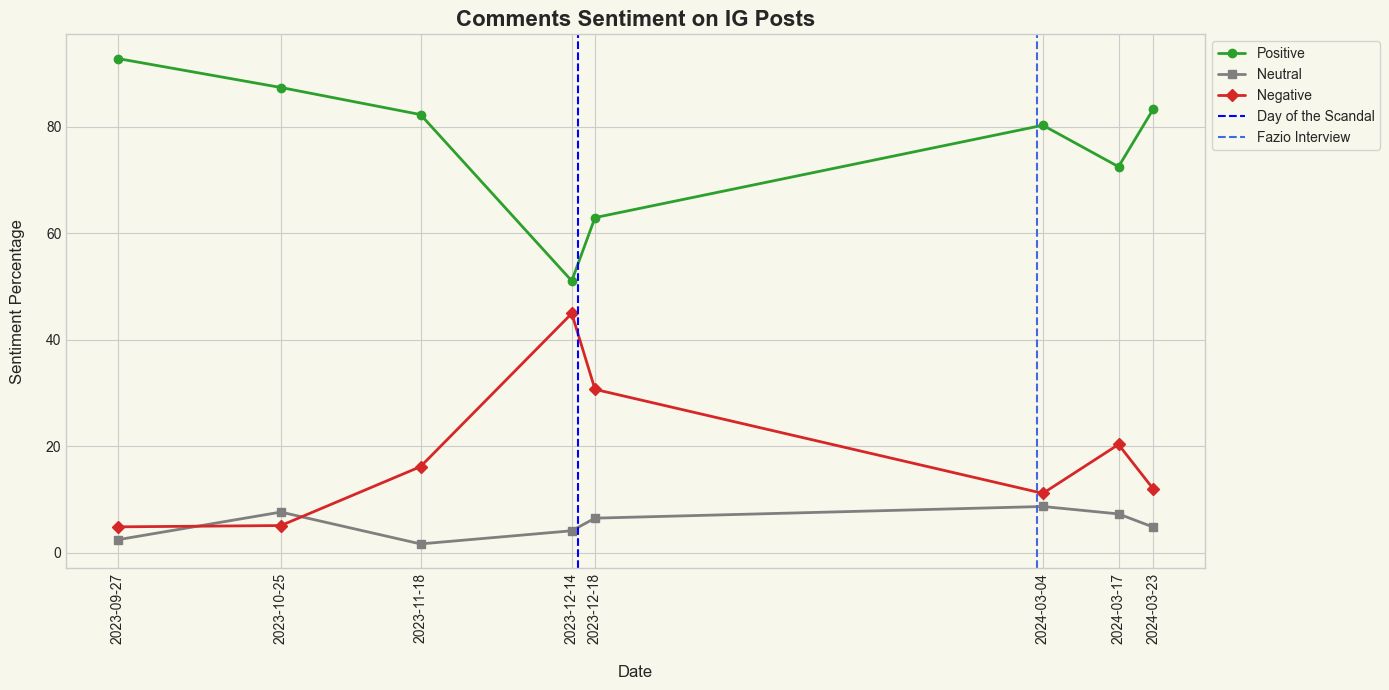

In [ ]:
# plotting the sentiment distribution of Instagram posts over time
if 'date_of_post' in posts_sentiment.columns:
    posts_sentiment.set_index('date_of_post', inplace=True)
posts_sentiment.index = pd.to_datetime(posts_sentiment.index)

#selecting dates
specific_dates = pd.to_datetime(['2023-09-27', '2023-10-25', '2023-11-18', '2023-12-14', '2023-12-18', '2024-03-04', '2024-03-17', '2024-03-23'])

# changing background color
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(14, 7))
fig.set_facecolor('#F8F7EB')
ax.set_facecolor('#F8F7EB')

# creating lines for each sentiment
ax.plot(posts_sentiment.index, posts_sentiment['Positive'], label='Positive', marker='o', linestyle='-', color='#2ca02c', linewidth=2)
ax.plot(posts_sentiment.index, posts_sentiment['Neutral'], label='Neutral', marker='s', linestyle='-', color='#7f7f7f', linewidth=2)
ax.plot(posts_sentiment.index, posts_sentiment['Negative'], label='Negative', marker='D', linestyle='-', color='#d62728', linewidth=2)

# visualizing interenting dates
ax.set_xticks(specific_dates)
ax.set_xticklabels([date.strftime('%Y-%m-%d') for date in specific_dates])

scandal_date = pd.to_datetime('2023-12-15')
fazio_interview = pd.to_datetime('2024-03-03')
ax.axvline(x=scandal_date, color='blue', linestyle='--', linewidth=1.5, label='Day of the Scandal')
ax.axvline(x=fazio_interview, color='royalblue', linestyle='--', linewidth=1.5, label='Fazio Interview')

ax.set_title('Comments Sentiment on IG Posts', fontsize=16, fontweight='bold')
ax.set_xlabel('Date', fontsize=12, labelpad=15)
ax.set_ylabel('Sentiment Percentage', fontsize=12, labelpad=15)
plt.xticks(rotation=90)

ax.legend(frameon=True, facecolor='#F8F7EB', loc='upper left', fontsize=10, bbox_to_anchor=(1,1))

plt.tight_layout()
plt.show()

## Facebook
### Read and classify sentiment on data

We have analyzed comments under articles about the scandal. Therefore, here the classifications are: "Contro Chiara Ferragni", "Felice della notizia", "A favore di Chiara Ferragni", "Neutrale".

### Comments on repubblica post of 15/12

In [ ]:
repubblica_comments = pd.read_csv('./FB_comments/repubblica_facebook.csv')
repubblica_comments['text'] = np.where(repubblica_comments['text'].str.contains('https'), np.nan, repubblica_comments['text'])
print(len(repubblica_comments))
repubblica_comments.dropna(subset=['text'], inplace=True)
print(len(repubblica_comments))
repubblica_comments['text'].head(10)

365
365


0                   Finalmente una buona notizia 🎉 🎉🎉🎉
1                                                GODO!
2                                      Finalmente !!!!
3                                               Spicci
4    La multa la dovrebbero pagare tutti quei ML di...
5    Ammiro la coppia per la loro generosità , e gl...
6    Mandiamoli anche a Sanremo...mi raccomando.......
7    Mi fa tristezza la quantità di tutti gli adept...
8                                       Complimenti...
9                                  Finalmente!!!!!!!!!
Name: text, dtype: object

Given the complexity of discerning semtiments from text, we have employed the "Mistral-small" model, which is better suited for handling context-heavy tasks.

In [ ]:
api_key = "XNjiqIP1IeZxKfbtXckwD5duNvCMyfyZ"
model = "mistral-small-latest"
client = MistralClient(api_key=api_key)

# message to contextualize the analysis based on the article's content, telling the model to classify the comments into one of the four categories
titolo = "Chiara Ferragni multata dall'antitrust per oltre 1 milione di euro per il caso del pandoro Balocco"
contesto_prompt = "Un commento che esprime gioia o felecità va classificato come 'Felice della notizia'. Un commento neutrale va classificato come 'Neutrale'. Un commento che esprime supporto a Chiara Ferragni va classificato come 'A favore di Chiara Ferragni'. Un commento che critica Chiara Ferragni va classificato come 'Contro Chiara Ferragni'."
system_message = ChatMessage(role="system", content=f"L'articolo è il seguente: '{titolo}'. Classifica il sentimento dei seguenti commenti all'articolo su facebook in una delle 4 categorie: 'Felice della notizia', 'Neutrale', 'A favore di Chiara Ferragni' o 'Contro Chiara Ferragni'. /n {contesto_prompt}")

# aligning with the defined categories
prompt_format = "Classifica il sentimento di questo commento, rispondendo solo con 'Felice della notizia', 'Neutrale', 'A favore di Chiara Ferragni' o 'Contro Chiara Ferragni':"
messages = [system_message] + [ChatMessage(role="user", content = f"{prompt_format} {comment}") for comment in repubblica_comments['text']]

# performing sentiment analysis
sentiments = []
for message in messages:
    try:
        response = client.chat(model=model, messages=[message])
        sentiment = response.choices[0].message.content  # Assuming each response has one sentiment
        sentiments.append(sentiment)
    except Exception as e:
        print(f"An error occurred with message '{message.content}': {e}")
        sentiments.append("Error")

In [ ]:
# Since when classifying the model will find ot only the indeces that we need but also parts of the sentences
# that are not useful four our classificatio (e.g. Contro Chiara Ferragni because...; we do not need the because part),
# this code will extract only the initial part of the indeces.
# Moreover, in some sentiments two different classifications may appear, one after the other. To solve this problem and classifying
# the comment under only one sentiment, the code compares the index position of these sentences. In order to do so the code assigns a very high value
# to the index position of a phrase when it's not found, ensuring that if the phrase is not present, its index become higher than any valid index position in the sentiment
# In this way it is possible to see which phrase comes first and to define it as the sentiment.

simplified_sentiments = []

for sentiment in sentiments[1:]:

    idx_felice = sentiment.lower().find('felice della notizia')
    idx_neutrale = sentiment.lower().find('neutrale')
    idx_supporto = sentiment.lower().find('a favore di chiara ferragni')
    idx_critica = sentiment.lower().find('contro chiara ferragni')

    idx_felice = idx_felice if idx_felice != -1 else float('inf')
    idx_neutrale = idx_neutrale if idx_neutrale != -1 else float('inf')
    idx_supporto = idx_supporto if idx_supporto != -1 else float('inf')
    idx_critica = idx_critica if idx_critica != -1 else float('inf')

    if idx_felice == float('inf') and idx_neutrale == float('inf') and idx_supporto == float('inf') and idx_critica == float('inf'):
        min_idx = 1000000
    else:
        min_idx = min(idx_felice, idx_critica, idx_supporto, idx_neutrale)

    if min_idx == idx_felice:
        simplified_sentiments.append('Felice')
    elif min_idx == idx_neutrale:
        simplified_sentiments.append('Neutrale')
    elif min_idx == idx_critica:
        simplified_sentiments.append('Contro Chiara Ferragni')
    elif min_idx == idx_supporto:
        simplified_sentiments.append('Pro Chiara Ferragni')
    else:

        simplified_sentiments.append('Non Classificato')

# Now, 'simplified_sentiments' contains the simplified classification based on the appearence order

In [ ]:
simplified_sentiments[:5]

['Felice', 'Felice', 'Felice', 'Neutrale', 'Contro Chiara Ferragni']

In [ ]:
# adding a column with the sentiments associated with the text of the comments
repubblica_comments['sentiment'] = simplified_sentiments
repubblica_comments = repubblica_comments[['sentiment', 'text']]
repubblica_comments[:10]

,sentiment,text
0,Felice,Finalmente una buona notizia 🎉 🎉🎉🎉
1,Felice,GODO!
2,Felice,Finalmente !!!!
3,Neutrale,Spicci
4,Contro Chiara Ferragni,La multa la dovrebbero pagare tutti quei ML di...
5,Felice,"Ammiro la coppia per la loro generosità , e gl..."
6,Neutrale,Mandiamoli anche a Sanremo...mi raccomando.......
7,Neutrale,Mi fa tristezza la quantità di tutti gli adept...
8,Felice,Complimenti...
9,Felice,Finalmente!!!!!!!!!


In [ ]:
# saving the dataset to avoid re-doing all the sentiment each time
'''repubblica_comments.to_csv('./FB_comments/repubblica_comments_sentiment.csv', index=False)'''

### Comments on corriere post of 15/12

Everyhting that has been made for the Repubblica's comments will be done also for the comments related to the Corriere's article.

In [ ]:
corriere_comments = pd.read_csv('./FB_comments/corriere_facebook.csv', sep=',')
corriere_comments['text'] = np.where(corriere_comments['text'].str.contains('https'), np.nan, corriere_comments['text'])
print(len(corriere_comments))
corriere_comments.dropna(subset=['text'], inplace=True)
print(len(corriere_comments))
corriere_comments['text'].head(20)

269
269


0               A questo punto spero la multa raddoppi.
1                La vera beneficenza si fa in silenzio.
2     La Ferragni è l'autrice del libro "ogni giorno...
3     E voi applaudite quando compra l’ennesimo atti...
4                        È stato fatto in buona Fedez 😂
5                  Continuate a seguirli, mi raccomando
6                       Complimenti ai boccaloni 👏🏻👏🏻👏🏻
7     Mi rivolgo a chi segue questa signora e il suo...
8     Certo che continuerà la beneficenza...frutta m...
9                                    I’m buona fede…😂😂😂
10                             In buona fede Certo!🤑🤑🤑🤑
11                                       In buona Fedez
12          MI auguro che la multa vada in beneficenza!
13                            Buona fede e bella frode🤥
14                         ogni tanto una buona notizia
15                                           Pink Fedez
16                                  CHE BELLA GENTE....
17                          Beneficenza agli avv

In [ ]:
api_key = "XNjiqIP1IeZxKfbtXckwD5duNvCMyfyZ"
model = "mistral-small-latest"
client = MistralClient(api_key=api_key)

titolo = "Iconsumatori pagavano oltre 9 euro per il pandoro Pink Christmas di Balocco e Chiara Ferragni, più del doppio rispetto ai 3,70 euro del pandoro non griffato, credendo che una parte del ricavato sarebbe andato in beneficenza all’Ospedale Regina Margherita di Torino. In realtà, una donazione in cifra fissa era già stata effettuata dall’azienda e il sovrapprezzo è andato soltanto a beneficio di Balocco e della sua celebre testimonial. Per questo motivo, l’Anitrust ha comminato una multa di oltre un milione di euro alle società Fenice e Tbs Crew, riconducibili a Chiara Ferragni, e di 420 mila euro a Balocco per pratica commerciale scorretta. «Le suddette società hanno fatto intendere ai consumatori che acquistando il pandoro «griffato» Ferragni avrebbero contribuito a una donazione all’Ospedale Regina Margherita di Torino. La donazione, di 50 mila euro, era stata invece già effettuata dalla sola Balocco mesi prima. Le società riconducibili a Chiara Ferragni hanno incassato dall’iniziativa oltre un milione di euro», sottolinea l’autorità."
contesto_prompt = "Un commento che esprime gioia o felecità va classificato come 'Felice della notizia'. Un commento neutrale va classificato come 'Neutrale'. Un commento che esprime supporto a Chiara Ferragni va classificato come 'A favore di Chiara Ferragni'. Un commento che critica Chiara Ferragni va classificato come 'Contro Chiara Ferragni'."
system_message = ChatMessage(role="system", content=f"L'articolo è il seguente: '{titolo}'. Classifica il sentimento dei seguenti commenti all'articolo su facebook in una delle 4 categorie: 'Felice della notizia', 'Neutrale', 'A favore di Chiara Ferragni' o 'Contro Chiara Ferragni'. /n {contesto_prompt}")

prompt_format = "Classifica il sentimento di questo commento, rispondendo solo con 'Felice della notizia', 'Neutrale', 'A favore di Chiara Ferragni' o 'Contro Chiara Ferragni':"
messages = [system_message] + [ChatMessage(role="user", content = f"{prompt_format} {comment}") for comment in corriere_comments['text']]

sentiments = []
for message in messages:
    try:
        response = client.chat(model=model, messages=[message])
        sentiment = response.choices[0].message.content  # Assuming each response has one sentiment
        sentiments.append(sentiment)
    except Exception as e:
        print(f"An error occurred with message '{message.content}': {e}")
        sentiments.append("Error")

In [ ]:
simplified_sentiments = []

for sentiment in sentiments[1:]:

    idx_felice = sentiment.lower().find('felice della notizia')
    idx_neutrale = sentiment.lower().find('neutrale')
    idx_supporto = sentiment.lower().find('a favore di chiara ferragni')
    idx_critica = sentiment.lower().find('contro chiara ferragni')

    idx_felice = idx_felice if idx_felice != -1 else float('inf')
    idx_neutrale = idx_neutrale if idx_neutrale != -1 else float('inf')
    idx_supporto = idx_supporto if idx_supporto != -1 else float('inf')
    idx_critica = idx_critica if idx_critica != -1 else float('inf')

    if idx_felice == float('inf') and idx_neutrale == float('inf') and idx_supporto == float('inf') and idx_critica == float('inf'):
        min_idx = 1000000
    else:
        min_idx = min(idx_felice, idx_critica, idx_supporto, idx_neutrale)

    if min_idx == idx_felice:
        simplified_sentiments.append('Felice')
    elif min_idx == idx_neutrale:
        simplified_sentiments.append('Neutrale')
    elif min_idx == idx_critica:
        simplified_sentiments.append('Contro Chiara Ferragni')
    elif min_idx == idx_supporto:
        simplified_sentiments.append('Pro Chiara Ferragni')
    else:

        simplified_sentiments.append('Non Classificato')



In [ ]:
corriere_comments['sentiment'] = simplified_sentiments
corriere_comments = corriere_comments[['sentiment', 'text']]
corriere_comments[:10]

,sentiment,text
0,Contro Chiara Ferragni,A questo punto spero la multa raddoppi.
1,Neutrale,La vera beneficenza si fa in silenzio.
2,Felice,"La Ferragni è l'autrice del libro ""ogni giorno..."
3,Neutrale,E voi applaudite quando compra l’ennesimo atti...
4,Felice,È stato fatto in buona Fedez 😂
5,Neutrale,"Continuate a seguirli, mi raccomando"
6,Neutrale,Complimenti ai boccaloni 👏🏻👏🏻👏🏻
7,Contro Chiara Ferragni,Mi rivolgo a chi segue questa signora e il suo...
8,Neutrale,Certo che continuerà la beneficenza...frutta m...
9,Neutrale,I’m buona fede…😂😂😂


In [ ]:
'''corriere_comments.to_csv('./FB_comments/corriere_comments_sentiment.csv', index=False)'''

### Comments on IL Giornale post of 15/12

Everyhting that has been made for the Repubblica's and Corriere's comments will be done also for the comments related to the IlGiornale's article.

In [ ]:
ilgiornale_comments = pd.read_csv('./FB_comments/ilgiornale_facebook.csv')
ilgiornale_comments['text'] = np.where(ilgiornale_comments['text'].str.contains('https'), np.nan, ilgiornale_comments['text'])
print(len(ilgiornale_comments))
ilgiornale_comments.dropna(subset=['text'], inplace=True)
print(len(ilgiornale_comments))
ilgiornale_comments['text'].head(10)

181
170


1     Su queste cose occorre essere spietati..la san...
2     La beneficenza fatela al vostro vicino.....bre...
3           Spero che  la sanzione vada in beneficenza…
4                            Brava furbetta gesto basso
5                                          Finalmente!!
6             Alla faccia della solidarietà,  la sua...
7     Alla faccia della beneficenza.  Complementoni ...
8                   Brava Chiara e tutti i suoi seguaci
9     Sarà  sicuramente riassunta per i prossimi spo...
10                  Pessimo esempio...l'ho sempre detto
Name: text, dtype: object

In [ ]:
api_key = "XNjiqIP1IeZxKfbtXckwD5duNvCMyfyZ"
model = "mistral-small-latest"
client = MistralClient(api_key=api_key)

titolo = "Chiara Ferragni e le sue società hanno ricevuto una sanzione complessiva di oltre un milione di euro dall'Antitrust in relazione all'affare Balocco. Le società Fenice e TBS Crew, gestori dei marchi dell'influencer, sono state multate rispettivamente per 400 mila euro e 675 mila euro, mentre Balocco Industria Dolciaria ha ricevuto una multa di 420 mila euro. L'accusa riguarda una pratica commerciale scorretta legata alla pubblicità del Pandoro Pink Christmas, associato a Chiara Ferragni, che ha erroneamente suggerito ai consumatori che l'acquisto avrebbe contribuito a una donazione all'Ospedale Regina Margherita di Torino, quando in realtà la donazione era stata effettuata"
contesto_prompt = "Un commento che esprime gioia o felecità va classificato come 'Felice della notizia'. Un commento neutrale va classificato come 'Neutrale'. Un commento che esprime supporto a Chiara Ferragni va classificato come 'A favore di Chiara Ferragni'. Un commento che critica Chiara Ferragni va classificato come 'Contro Chiara Ferragni'."
system_message = ChatMessage(role="system", content=f"L'articolo è il seguente: '{titolo}'. Classifica il sentimento dei seguenti commenti all'articolo su facebook in una delle 4 categorie: 'Felice della notizia', 'Neutrale', 'A favore di Chiara Ferragni' o 'Contro Chiara Ferragni'. /n {contesto_prompt}")

prompt_format = "Classifica il sentimento di questo commento, rispondendo solo con 'Felice della notizia', 'Neutrale', 'A favore di Chiara Ferragni' o 'Contro Chiara Ferragni':"
messages = [system_message] + [ChatMessage(role="user", content = f"{prompt_format} {comment}") for comment in ilgiornale_comments['text']]

sentiments = []
for message in messages:
    try:
        response = client.chat(model=model, messages=[message])
        sentiment = response.choices[0].message.content
        sentiments.append(sentiment)
    except Exception as e:
        print(f"An error occurred with message '{message.content}': {e}")
        sentiments.append("Error")

In [ ]:
simplified_sentiments = []

for sentiment in sentiments[1:]:

    idx_felice = sentiment.lower().find('felice della notizia')
    idx_neutrale = sentiment.lower().find('neutrale')
    idx_supporto = sentiment.lower().find('a favore di chiara ferragni')
    idx_critica = sentiment.lower().find('contro chiara ferragni')

    idx_felice = idx_felice if idx_felice != -1 else float('inf')
    idx_neutrale = idx_neutrale if idx_neutrale != -1 else float('inf')
    idx_supporto = idx_supporto if idx_supporto != -1 else float('inf')
    idx_critica = idx_critica if idx_critica != -1 else float('inf')

    if idx_felice == float('inf') and idx_neutrale == float('inf') and idx_supporto == float('inf') and idx_critica == float('inf'):
        min_idx = 1000000
    else:
        min_idx = min(idx_felice, idx_critica, idx_supporto, idx_neutrale)

    if min_idx == idx_felice:
        simplified_sentiments.append('Felice')
    elif min_idx == idx_neutrale:
        simplified_sentiments.append('Neutrale')
    elif min_idx == idx_critica:
        simplified_sentiments.append('Contro Chiara Ferragni')
    elif min_idx == idx_supporto:
        simplified_sentiments.append('Pro Chiara Ferragni')
    else:

        simplified_sentiments.append('Non Classificato')


In [ ]:
ilgiornale_comments['sentiment'] = simplified_sentiments
ilgiornale_comments = ilgiornale_comments[['sentiment', 'text']]
ilgiornale_comments[:10]

,sentiment,text
1,Neutrale,Su queste cose occorre essere spietati..la san...
2,Neutrale,La beneficenza fatela al vostro vicino.....bre...
3,Neutrale,Spero che la sanzione vada in beneficenza…
4,Contro Chiara Ferragni,Brava furbetta gesto basso
5,Neutrale,Finalmente!!
6,Contro Chiara Ferragni,"Alla faccia della solidarietà, la sua..."
7,Contro Chiara Ferragni,Alla faccia della beneficenza. Complementoni ...
8,Felice,Brava Chiara e tutti i suoi seguaci
9,Felice,Sarà sicuramente riassunta per i prossimi spo...
10,Contro Chiara Ferragni,Pessimo esempio...l'ho sempre detto


In [ ]:
'''ilgiornale_comments.to_csv('./FB_comments/ilgiornale_comments_sentiment.csv', index=False)'''

## Re-load data

Read facebook sentiment data without compute the sentiment again

In [ ]:
# reading facebook sentiment data
repubblica_comments = pd.read_csv('./FB_comments/repubblica_comments_sentiment.csv')
corriere_comments = pd.read_csv('./FB_comments/corriere_comments_sentiment.csv')
ilgiornale_comments = pd.read_csv('./FB_comments/ilgiornale_comments_sentiment.csv')

On facebook our model fails to classify perfectly; turns out to be too moderate, and sometimes classifies comments critical of Clare as neutral.

In [ ]:
# we combine the sentiments of the comments of the various articles into one dataframe where we have article, count comments against chiara ferragni, count comments in favor of chiara ferragni, count happy comments, count neutral comments

def count_sentiments(df, source_name):
    counts = df.groupby('sentiment')['text'].count()
    return pd.DataFrame({
        'Articolo': source_name,
        'Contro Chiara Ferragni': counts.get('Contro Chiara Ferragni', 0),
        'Pro Chiara Ferragni': counts.get('Pro Chiara Ferragni', 0),
        'Felici': counts.get('Felice', 0),
        'Neutri': counts.get('Neutrale', 0)
    }, index=[0])

ilgiornale_counts = count_sentiments(ilgiornale_comments, 'Il Giornale')
corriere_counts = count_sentiments(corriere_comments, 'Corriere della Sera')
repubblica_counts = count_sentiments(repubblica_comments, 'La Repubblica')

all_counts = pd.concat([ilgiornale_counts, corriere_counts, repubblica_counts], ignore_index=True)
all_counts

,Articolo,Contro Chiara Ferragni,Pro Chiara Ferragni,Felici,Neutri
0,Il Giornale,31,4,20,112
1,Corriere della Sera,30,4,25,209
2,La Repubblica,47,11,52,249


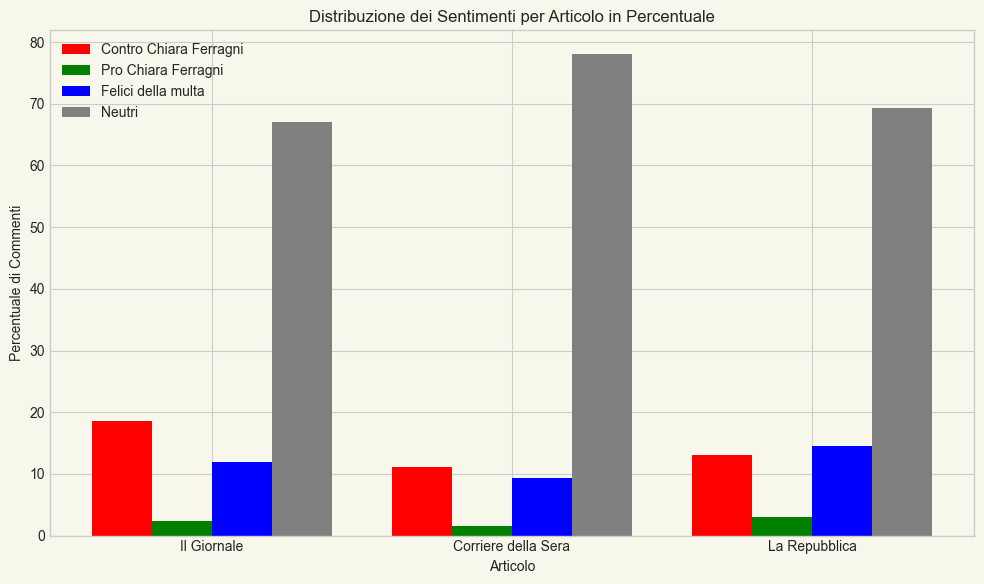

In [ ]:
# plotting an histogram to see, for each article, how sentiment is distributed
all_counts['Total'] = all_counts['Contro Chiara Ferragni'] + all_counts['Pro Chiara Ferragni'] + all_counts['Felici'] + all_counts['Neutri']
all_counts['Perc_Contro'] = (all_counts['Contro Chiara Ferragni'] / all_counts['Total']) * 100
all_counts['Perc_Favore'] = (all_counts['Pro Chiara Ferragni'] / all_counts['Total']) * 100
all_counts['Perc_Felici'] = (all_counts['Felici'] / all_counts['Total']) * 100
all_counts['Perc_Neutri'] = (all_counts['Neutri'] / all_counts['Total']) * 100

# plot background
fig, ax = plt.subplots(figsize=(10, 6))
fig.set_facecolor('#F8F7EB')
ax.set_facecolor('#F8F7EB')


bar_width = 0.2
index = all_counts.index
r1 = index
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]


ax.bar(r1, all_counts['Perc_Contro'], width=bar_width, label='Contro Chiara Ferragni', color='r')
ax.bar(r2, all_counts['Perc_Favore'], width=bar_width, label='Pro Chiara Ferragni', color='g')
ax.bar(r3, all_counts['Perc_Felici'], width=bar_width, label='Felici della multa', color='b')
ax.bar(r4, all_counts['Perc_Neutri'], width=bar_width, label='Neutri', color='grey')


ax.set_xlabel('Articolo')
ax.set_ylabel('Percentuale di Commenti')
ax.set_title('Distribuzione dei Sentimenti per Articolo in Percentuale')
ax.set_xticks([r + bar_width * 1.5 for r in range(len(all_counts))])  # Adjust the x-ticks to center
ax.set_xticklabels(all_counts['Articolo'])
ax.legend()


sns.set(style="whitegrid", rc={"axes.facecolor": "#F8F7EB", "figure.facecolor": "#F8F7EB"})

plt.tight_layout()
plt.show()

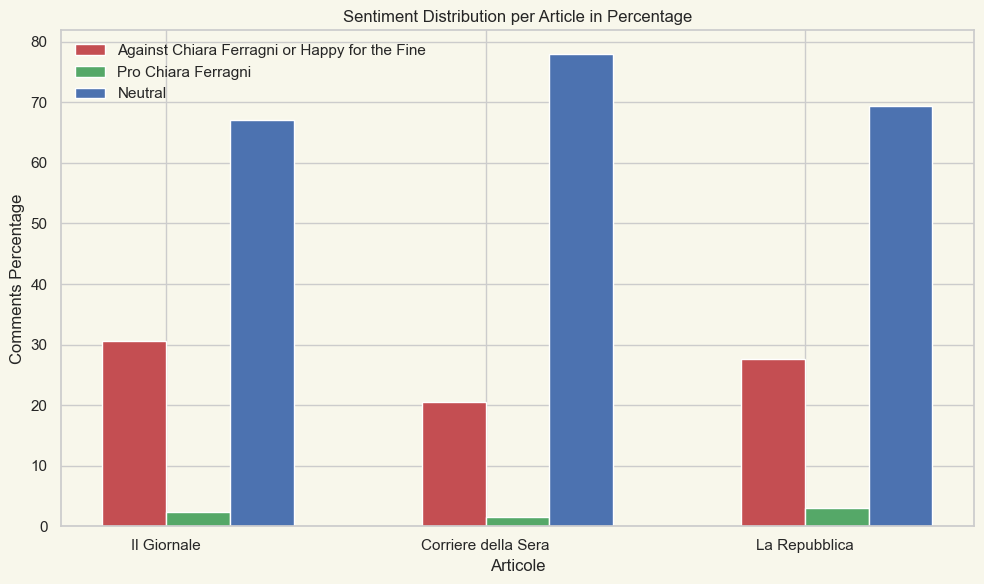

In [ ]:
# ploting again the sentiment distribution for each article but with all_counts['Contro Chiara Ferragni'] and all_counts['Felici'] in the same bar
# since they are expressing the same sentiment

fig, ax = plt.subplots(figsize=(10, 6))
fig.set_facecolor('#F8F7EB')
ax.set_facecolor('#F8F7EB')


all_counts['Total'] = all_counts['Contro Chiara Ferragni'] + all_counts['Pro Chiara Ferragni'] + all_counts['Felici'] + all_counts['Neutri']

all_counts['Perc_Contro'] = ((all_counts['Contro Chiara Ferragni'] / all_counts['Total']) + (all_counts['Felici'] / all_counts['Total'])) * 100
all_counts['Perc_Favore'] = (all_counts['Pro Chiara Ferragni'] / all_counts['Total']) * 100
all_counts['Perc_Neutri'] = (all_counts['Neutri'] / all_counts['Total']) * 100


bar_width = 0.2
index = all_counts.index
r1 = index
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

bar1 = ax.bar(r1, all_counts['Perc_Contro'], width=bar_width, label='Against Chiara Ferragni or Happy for the Fine', color='r')
bar2 = ax.bar(r2, all_counts['Perc_Favore'], width=bar_width, label='Pro Chiara Ferragni', color='g')
bar3 = ax.bar(r3, all_counts['Perc_Neutri'], width=bar_width, label='Neutral', color='b')

ax.set_xlabel('Articole')
ax.set_ylabel('Comments Percentage')
ax.set_title('Sentiment Distribution per Article in Percentage')
ax.set_xticks([r + bar_width/2 for r in range(len(all_counts))])
ax.set_xticklabels(all_counts['Articolo'])
ax.legend()

sns.set(style="whitegrid")
plt.tight_layout()
plt.show()

In [ ]:
all_comments = pd.concat([repubblica_comments, corriere_comments, ilgiornale_comments]).reset_index(drop=True)
pd.set_option('display.max_colwidth', 500)
all_comments.sample(10)

,sentiment,text
244,Contro Chiara Ferragni,Aspettiamo con ansia le chiacchiere che userà per giustificarsi.
129,Neutrale,Una piccola soddisfazione. La loro beneficenza? Questa: basata sull inganno
684,Neutrale,Tanti auguri di natale
472,Neutrale,Sicuroooo 😂
645,Felice,👏👏👏👏👏👏bravi!!
772,Neutrale,Che sia da organizzare una colletta ? 🤣
141,Felice,Per Natale lancerà polpette e braciole griffate
474,Contro Chiara Ferragni,Se impugnano spero che il tribunale raddoppi la multa!!!
586,Neutrale,Chiara Fregagni
22,Neutrale,I primi….


In [ ]:
# restyling the dataframe with colors and position of the texts

def color_sentiment(val):
    """
    Colors 'Positive' red and 'Negative' green.
    """
    color = 'red' if val == 'Contro Chiara Ferragni' or val == 'Felice' else 'green' if val == 'Pro Chiara Ferragni' else 'gray'
    return f'color: {color}'

sample_comments = all_comments.loc[[131,606,1,152,213,228,159,547,220,544]]
sample_comments = sample_comments.style.set_properties(**{'text-align': 'center'}).set_table_styles([dict(selector='th', props=[('text-align', 'center')])]).applymap(color_sentiment, subset=['sentiment'])

sample_comments

C:\Users\andre\AppData\Local\Temp\ipykernel_11240\2595531568.py:11: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  sample_comments = sample_comments.style.set_properties(**{'text-align': 'center'}).set_table_styles([dict(selector='th', props=[('text-align', 'center')])]).applymap(color_sentiment, subset=['sentiment'])


,sentiment,text
131,Pro Chiara Ferragni,"L""eroina delle donne!"
606,Neutrale,Si in buona fedez
1,Felice,GODO!
152,Contro Chiara Ferragni,È l'inzio della sua parabola discendente
213,Neutrale,Ora aspettiamoci la predica moralista...
228,Neutrale,Non è mica sempre festa.
159,Neutrale,Pochi!!
547,Contro Chiara Ferragni,Una vergogna…
220,Contro Chiara Ferragni,Fosse per me farebbe la fame.
544,Neutrale,Tutto in buona fede per le tue tasche carina


# Reddit

The configuration for Reddit is equal to the one used for Facebook, to capture sentiments in comments discussing Chiara Ferragni's scandal.
The only 2 differences are that the context is the one of the title of Reddit posts, and the comments given as input are the ones of reddit posts.
Specifically we have gathered the comments referred to 3 Reddit posts.

Post 1, 144 comments

In [ ]:
import praw

# accessing to Reddit servers with our credentials
reddit = praw.Reddit(client_id='OEgL2uPmYoDu61qnK_piSg',
                     client_secret='j7E3FBf5rGzy5vvVoQYuelBgVUlDLg',
                     user_agent='Massive_Advantage255')

# post ID
post_id = '18lwj4j'
submission = reddit.submission(id=post_id)
submission.comments.replace_more(limit=0)

# text of the original post
post_text = submission.selftext

comment_data = []

# iterating only through the top-level comments directly attached to the post, not considering "subcomments"
for top_level_comment in submission.comments:
    if isinstance(top_level_comment, praw.models.Comment):
        comment_info = {
            'Post Text': post_text,
            'Comment': top_level_comment.body,
        }
        comment_data.append(comment_info)

# DataFrame from the collected data
reddit_1 = pd.DataFrame(comment_data)

In [ ]:
print(len(reddit_1))
reddit_1['Post Text'][0]

143


'buongiorno,\n\nanche se le ascolto letteralmente TUTTE (ascoltando radio 24 dalla mattina alle 6, fino alla sera), cerco di stare il più lontano possibile dal commentare le notizie della realtà.\n\nOggi però ho le balle piene di queste pagliacciate e di questa ipocrisia che porta persone come Chiara Ferragni ad essere idolatrate come esempi di successo (che probabilmente sono, ma non per i meriti ed i valori che dovrebbero invece essere perseguiti).\n\nnel video non riesce neanche a piangere, recita un discorso imparato a memoria, con un finto strucco impeccabile.\n\ndicevano che in seguito alla vicenda Balocco, l’influencer perde oltre 16mila follower, ma il mio “problema” è che comunque 30 milioni di sprechi di ossigeno continuano a seguirla (e a venerarla, nei casi peggiori).\n\nnon so, ditemi la vostra perche io mi sento stanco di questa realtà finta.'

In [ ]:
# apllying Mistral small model to do sentiment exaclty like we have done for Facebook and using the same cassifications
api_key = "XNjiqIP1IeZxKfbtXckwD5duNvCMyfyZ"
model = "mistral-small-latest"
client = MistralClient(api_key=api_key)

titolo = 'buongiorno,\n\nanche se le ascolto letteralmente TUTTE (ascoltando radio 24 dalla mattina alle 6, fino alla sera), cerco di stare il più lontano possibile dal commentare le notizie della realtà.\n\nOggi però ho le balle piene di queste pagliacciate e di questa ipocrisia che porta persone come Chiara Ferragni ad essere idolatrate come esempi di successo (che probabilmente sono, ma non per i meriti ed i valori che dovrebbero invece essere perseguiti).\n\nnel video non riesce neanche a piangere, recita un discorso imparato a memoria, con un finto strucco impeccabile.\n\ndicevano che in seguito alla vicenda Balocco, l’influencer perde oltre 16mila follower, ma il mio “problema” è che comunque 30 milioni di sprechi di ossigeno continuano a seguirla (e a venerarla, nei casi peggiori).\n\nnon so, ditemi la vostra perche io mi sento stanco di questa realtà finta.'
contesto_prompt = "Un commento che esprime gioia o felecità va classificato come 'Felice della notizia'. Un commento neutrale va classificato come 'Neutrale'. Un commento che esprime supporto a Chiara Ferragni va classificato come 'A favore di Chiara Ferragni'. Un commento che critica Chiara Ferragni va classificato come 'Contro Chiara Ferragni'."
system_message = ChatMessage(role="system", content=f"Il post su reddit è il seguente: '{titolo}'. Classifica il sentimento dei seguenti commenti al post su Reddit in una delle 4 categorie: 'Felice della notizia', 'Neutrale', 'A favore di Chiara Ferragni' o 'Contro Chiara Ferragni'. /n {contesto_prompt}")

prompt_format = "Classifica il sentimento di questo commento, rispondendo solo con 'Felice della notizia', 'Neutrale', 'A favore di Chiara Ferragni' o 'Contro Chiara Ferragni':"
messages = [system_message] + [ChatMessage(role="user", content = f"{prompt_format} {comment}") for comment in reddit_1['Comment']]

# performingm sentiment analysis
sentiments = []
for message in messages:
    try:
        response = client.chat(model=model, messages=[message])
        sentiment = response.choices[0].message.content
        sentiments.append(sentiment)
    except Exception as e:
        print(f"An error occurred with message '{message.content}': {e}")
        sentiments.append("Error")
simplified_sentiments = []

for sentiment in sentiments[1:]:

    idx_felice = sentiment.lower().find('felice della notizia')
    idx_neutrale = sentiment.lower().find('neutrale')
    idx_supporto = sentiment.lower().find('a favore di chiara ferragni')
    idx_critica = sentiment.lower().find('contro chiara ferragni')


    idx_felice = idx_felice if idx_felice != -1 else float('inf')
    idx_neutrale = idx_neutrale if idx_neutrale != -1 else float('inf')
    idx_supporto = idx_supporto if idx_supporto != -1 else float('inf')
    idx_critica = idx_critica if idx_critica != -1 else float('inf')


    if idx_felice == float('inf') and idx_neutrale == float('inf') and idx_supporto == float('inf') and idx_critica == float('inf'):
        min_idx = 1000000
    else:
        min_idx = min(idx_felice, idx_critica, idx_supporto, idx_neutrale)


    if min_idx == idx_felice:
        simplified_sentiments.append('Felice')
    elif min_idx == idx_neutrale:
        simplified_sentiments.append('Neutrale')
    elif min_idx == idx_critica:
        simplified_sentiments.append('Contro Chiara Ferragni')
    elif min_idx == idx_supporto:
        simplified_sentiments.append('Pro Chiara Ferragni')
    else:

        simplified_sentiments.append('Non Classificato')

# adding a column with the sentiment classifications
reddit_1['sentiment'] = simplified_sentiments
reddit_1 = reddit_1[['Comment', 'sentiment']]

Post 2, 98 comments

In [ ]:
post_id = '18l9u3b'

submission = reddit.submission(id=post_id)

comment_data = []

submission.comments.replace_more(limit=0)

post_text = submission.selftext

for top_level_comment in submission.comments:
    if isinstance(top_level_comment, praw.models.Comment):
        comment_info = {
            'Comment': top_level_comment.body,
        }
        comment_data.append(comment_info)


reddit_2 = pd.DataFrame(comment_data)

In [ ]:
print(len(reddit_2))

98


In [ ]:
api_key = "XNjiqIP1IeZxKfbtXckwD5duNvCMyfyZ"
model = "mistral-small-latest"
client = MistralClient(api_key=api_key)

titolo = 'Chiara Ferragni e il caso Balocco: «Chiedo scusa e dono 1 milione di euro al Regina Margherita»'
contesto_prompt = "Un commento che esprime gioia o felecità va classificato come 'Felice della notizia'. Un commento neutrale va classificato come 'Neutrale'. Un commento che esprime supporto a Chiara Ferragni va classificato come 'A favore di Chiara Ferragni'. Un commento che critica Chiara Ferragni va classificato come 'Contro Chiara Ferragni'."
system_message = ChatMessage(role="system", content=f"Il post su reddit è il seguente: '{titolo}'. Classifica il sentimento dei seguenti commenti al post su Reddit in una delle 4 categorie: 'Felice della notizia', 'Neutrale', 'A favore di Chiara Ferragni' o 'Contro Chiara Ferragni'. /n {contesto_prompt}")

prompt_format = "Classifica il sentimento di questo commento, rispondendo solo con 'Felice della notizia', 'Neutrale', 'A favore di Chiara Ferragni' o 'Contro Chiara Ferragni':"
messages = [system_message] + [ChatMessage(role="user", content = f"{prompt_format} {comment}") for comment in reddit_2['Comment']]

sentiments = []
for message in messages:
    try:
        response = client.chat(model=model, messages=[message])
        sentiment = response.choices[0].message.content
        sentiments.append(sentiment)
    except Exception as e:
        print(f"An error occurred with message '{message.content}': {e}")
        sentiments.append("Error")
simplified_sentiments = []

for sentiment in sentiments[1:]:

    idx_felice = sentiment.lower().find('felice della notizia')
    idx_neutrale = sentiment.lower().find('neutrale')
    idx_supporto = sentiment.lower().find('a favore di chiara ferragni')
    idx_critica = sentiment.lower().find('contro chiara ferragni')

    idx_felice = idx_felice if idx_felice != -1 else float('inf')
    idx_neutrale = idx_neutrale if idx_neutrale != -1 else float('inf')
    idx_supporto = idx_supporto if idx_supporto != -1 else float('inf')
    idx_critica = idx_critica if idx_critica != -1 else float('inf')

    if idx_felice == float('inf') and idx_neutrale == float('inf') and idx_supporto == float('inf') and idx_critica == float('inf'):
        min_idx = 1000000
    else:
        min_idx = min(idx_felice, idx_critica, idx_supporto, idx_neutrale)

    if min_idx == idx_felice:
        simplified_sentiments.append('Felice')
    elif min_idx == idx_neutrale:
        simplified_sentiments.append('Neutrale')
    elif min_idx == idx_critica:
        simplified_sentiments.append('Contro Chiara Ferragni')
    elif min_idx == idx_supporto:
        simplified_sentiments.append('Pro Chiara Ferragni')
    else:

        simplified_sentiments.append('Non Classificato')

reddit_2['sentiment'] = simplified_sentiments

Post 3, 62 comments

In [ ]:
post_id = '18ix1x6'

submission = reddit.submission(id=post_id)

comment_data = []

submission.comments.replace_more(limit=0)

post_text = submission.selftext

for top_level_comment in submission.comments:
    if isinstance(top_level_comment, praw.models.Comment):
        comment_info = {
            'Comment': top_level_comment.body,
        }
        comment_data.append(comment_info)

reddit_3 = pd.DataFrame(comment_data)

In [ ]:
print(len(reddit_3))

62


In [ ]:
api_key = "XNjiqIP1IeZxKfbtXckwD5duNvCMyfyZ"
model = "mistral-small-latest"
client = MistralClient(api_key=api_key)

titolo = "Antitrust, maxi multa a Chiara Ferragni e Balocco per pandoro... ma dico certe personalità così socialmente esposte non hanno il dovere di prestare un po' più attenzione alle cose che fanno?"
contesto_prompt = "Un commento che esprime gioia o felecità va classificato come 'Felice della notizia'. Un commento neutrale va classificato come 'Neutrale'. Un commento che esprime supporto a Chiara Ferragni va classificato come 'A favore di Chiara Ferragni'. Un commento che critica Chiara Ferragni va classificato come 'Contro Chiara Ferragni'."
system_message = ChatMessage(role="system", content=f"Il post su reddit è il seguente: '{titolo}'. Classifica il sentimento dei seguenti commenti al post su Reddit in una delle 4 categorie: 'Felice della notizia', 'Neutrale', 'A favore di Chiara Ferragni' o 'Contro Chiara Ferragni'. /n {contesto_prompt}")

prompt_format = "Classifica il sentimento di questo commento, rispondendo solo con 'Felice della notizia', 'Neutrale', 'A favore di Chiara Ferragni' o 'Contro Chiara Ferragni':"
messages = [system_message] + [ChatMessage(role="user", content = f"{prompt_format} {comment}") for comment in reddit_3['Comment']]

sentiments = []
for message in messages:
    try:
        response = client.chat(model=model, messages=[message])
        sentiment = response.choices[0].message.content
        sentiments.append(sentiment)
    except Exception as e:
        print(f"An error occurred with message '{message.content}': {e}")
        sentiments.append("Error")
simplified_sentiments = []

for sentiment in sentiments[1:]:

    idx_felice = sentiment.lower().find('felice della notizia')
    idx_neutrale = sentiment.lower().find('neutrale')
    idx_supporto = sentiment.lower().find('a favore di chiara ferragni')
    idx_critica = sentiment.lower().find('contro chiara ferragni')

    idx_felice = idx_felice if idx_felice != -1 else float('inf')
    idx_neutrale = idx_neutrale if idx_neutrale != -1 else float('inf')
    idx_supporto = idx_supporto if idx_supporto != -1 else float('inf')
    idx_critica = idx_critica if idx_critica != -1 else float('inf')

    if idx_felice == float('inf') and idx_neutrale == float('inf') and idx_supporto == float('inf') and idx_critica == float('inf'):
        min_idx = 1000000
    else:
        min_idx = min(idx_felice, idx_critica, idx_supporto, idx_neutrale)

    if min_idx == idx_felice:
        simplified_sentiments.append('Felice')
    elif min_idx == idx_neutrale:
        simplified_sentiments.append('Neutrale')
    elif min_idx == idx_critica:
        simplified_sentiments.append('Contro Chiara Ferragni')
    elif min_idx == idx_supporto:
        simplified_sentiments.append('Pro Chiara Ferragni')
    else:

        simplified_sentiments.append('Non Classificato')

reddit_3['sentiment'] = simplified_sentiments

In [ ]:
'''# we merge the 3 dataframes of comments on reddit into a single dataframe and add a column for indicating the post number
reddit_1['Post'] = 1
reddit_2['Post'] = 2
reddit_3['Post'] = 3

reddit_comments = pd.concat([reddit_1, reddit_2, reddit_3], ignore_index=True)

# saving the df to avoid to re-run the sentiment analysis each time
reddit_comments.to_csv('./Reddit_comments/reddit_comments_sentiment.csv', index=False)'''

## Re-load reddit sentiment data

In [ ]:
reddit_comments = pd.read_csv('./Reddit_comments/reddit_comments_sentiment.csv')

In [ ]:
# create a dataframe with the sentiment counts for each post
reddit_counts = reddit_comments.groupby(['Post', 'sentiment']).size().unstack(fill_value=0)
reddit_counts.columns = reddit_counts.columns.get_level_values(0)  # This flattens the columns if they are MultiIndex
reddit_counts.reset_index(inplace=True)
reddit_counts = reddit_counts[['Post', 'Contro Chiara Ferragni', 'Pro Chiara Ferragni', 'Felice', 'Neutrale']]

reddit_counts.head()

sentiment,Post,Contro Chiara Ferragni,Pro Chiara Ferragni,Felice,Neutrale
0,1,26,4,4,110
1,2,19,1,5,73
2,3,13,0,2,47


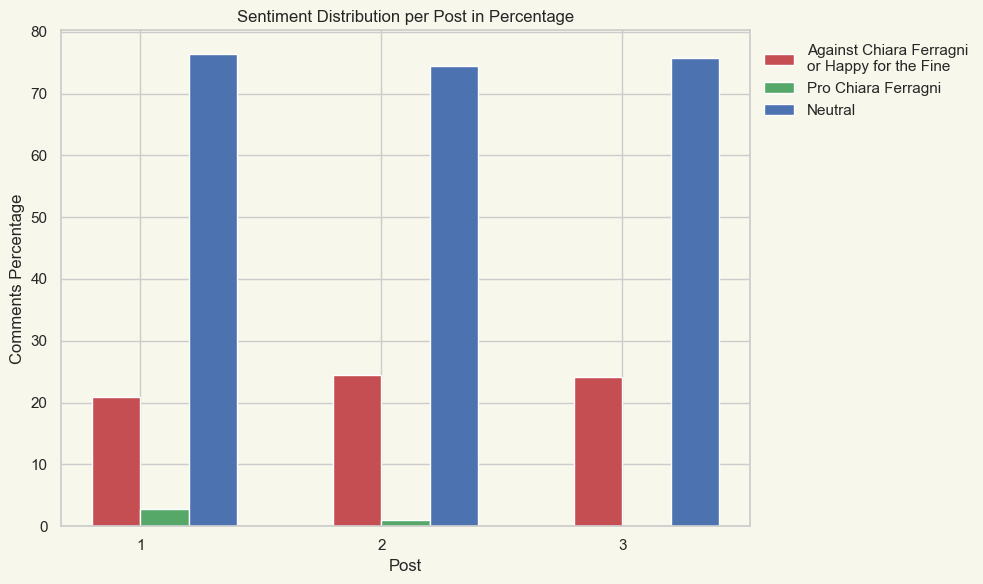

In [ ]:
# plotting the distribution of sentiment

# plot background
fig, ax = plt.subplots(figsize=(10, 6))
fig.set_facecolor('#F8F7EB')
ax.set_facecolor('#F8F7EB')

reddit_counts['Total'] = reddit_counts['Contro Chiara Ferragni'] + reddit_counts['Pro Chiara Ferragni'] + reddit_counts['Felice'] + reddit_counts['Neutrale']

reddit_counts['Perc_Contro'] = ((reddit_counts['Contro Chiara Ferragni'] / reddit_counts['Total']) + (reddit_counts['Felice'] / reddit_counts['Total'])) * 100
reddit_counts['Perc_Favore'] = (reddit_counts['Pro Chiara Ferragni'] / reddit_counts['Total']) * 100
reddit_counts['Perc_Neutri'] = (reddit_counts['Neutrale'] / reddit_counts['Total']) * 100

bar_width = 0.2
index = range(len(reddit_counts))
r1 = index
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

ax.bar(r1, reddit_counts['Perc_Contro'], width=bar_width, label='Against Chiara Ferragni\nor Happy for the Fine', color='r')
ax.bar(r2, reddit_counts['Perc_Favore'], width=bar_width, label='Pro Chiara Ferragni', color='g')
ax.bar(r3, reddit_counts['Perc_Neutri'], width=bar_width, label='Neutral', color='b')

ax.set_xlabel('Post')
ax.set_ylabel('Comments Percentage')
ax.set_title('Sentiment Distribution per Post in Percentage')
ax.set_xticks([r + bar_width/2 for r in index])
ax.set_xticklabels(reddit_counts['Post'])

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

sns.set(style="whitegrid")
plt.tight_layout()
plt.show()

In [ ]:
pd.set_option('display.max_colwidth', 500)
reddit_comments.sample(10)

,Comment,sentiment,Post
116,"Il tuo è un commento un po' fine a se stesso, Ferragni è prima di tutto imprenditrice, e in questo non si può dire non ci abbia messo del suo per fare carriera, il problema nasce quando un imprenditore ha anche una vita pubblica documentata 24h su 24h, prendi un qualsiasi dirigente di azienda e mettilo sotto la lente d'ingrandimento e vedrai quante magagne, il punto è che secondo me non doveva scusarsi, mi sarei limitato ad un ""siamo al corrente del problema e stiamo facendo di tutto per ris...",Neutrale,1
242,"Trovo aberrante sfruttare la beneficenza per vendere un prodotto, anche fosse genuina. \n\nSe poi è pure farlocca sei proprio una merda",Neutrale,3
240,"Non c'è speranza, siamo un popolo di rincoglioniti.\n\n\n> **La tuta che indossa Chiara Ferragni nel video di scuse è sold out** - https://www.open.online/2023/12/20/chiara-ferragni-tuta-scuse-video-capo-sold-out/",Neutrale,2
166,"Nel mulino che vorrei, basterebbe sta storia per sotterrarla definitivamente come influencer di qualunquecosa\n\nE invece tra una settimana nessuno si ricorderà più niente, come il compleanno all'Esselunga\n\nChe amarezza",Neutrale,2
60,"Da quando si è iniziato a stigmatizzare una persona per un suo errore? A me di Chiara Ferragni non frega proprio nulla ma non è che dopo questo “scandalo” con la Balocco allora mi aspetto che venga ostracizzata dal mondo intero, vediamo di mettere le cose sul giusto piano. \n\nNon si è mica scoperto che rapisce i bambini per bere il loro sangue, non ha fatto del male nè molestato nessuno, nè tantomeno ha arrecato un danno economico a qualcuno, chi voleva comprava il Pandoro e chi non lo vole...",Neutrale,1
279,"Se scrivessi davvero cosa penso di questi ""influencer"" probabilmente verrei bannato.\n\nDico solo che siamo ai limiti della circonvenzione di incapace.",Neutrale,3
259,"Non vedo l'ora dell'ascesa degli influencer IA e mandare nell'oblio figure come queste. Non ho mai seguito/letto un post di questa donna ma il narcisismo e il finto buonismo che mostra nei media è aberrante, è vero che a volte i soldi rendono mostri le persone...\n\nLa domanda sorge spontanea: la Balocco aveva già fatto la donazione, quanto è responsabile per la società di Ferragni che si è messa i soldi in tasca?",Contro Chiara Ferragni,3
113,Ho scoperto che ka mia ragazza la segue e ha messo like al suo finto video di pianto. Non so come reagire onestamente: mi manca il fiato,Neutrale,1
173,"la faccia come il deretano.\n\nse non la sgamavano col piffero che donava i soldi\n\n> «Sono sempre stata convinta che chi è più fortunato ha la responsabilità morale di fare del bene — scrive su Instagram insieme a un video nel quale appare provata, quasi alle lacrime —. Questi sono i valori che hanno sempre spinto me e la mia famiglia. Questo è quello che insegniamo ai nostri figli. Gli insegniamo anche che si può sbagliare, e che quando capita bisogna ammettere, e se possibile, rimedi...",Felice,2
177,"[Zio Peppe MODE ON]\nQuesta caca millioni di euro come bruscolini, io veramente boh.\n[Zio Peppe MODE OFF]",Neutrale,2


In [ ]:
# restyling the dataframe by assigning colors to the sentiments and adjusting how comments are displayed
def color_sentiment(val):
    color = 'red' if val == 'Contro Chiara Ferragni' or val == 'Felice' else 'green' if val == 'Pro Chiara Ferragni' else 'gray'
    return f'color: {color}'

sample_comments = reddit_comments.loc[[230,182,204,140,190,269,276,123,189,215]]
sample_comments = sample_comments.style.set_properties(**{'text-align': 'center'}).set_table_styles([dict(selector='th', props=[('text-align', 'center')])]).applymap(color_sentiment, subset=['sentiment'])

sample_comments

C:\Users\andre\AppData\Local\Temp\ipykernel_11240\2536401392.py:7: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  sample_comments = sample_comments.style.set_properties(**{'text-align': 'center'}).set_table_styles([dict(selector='th', props=[('text-align', 'center')])]).applymap(color_sentiment, subset=['sentiment'])


,Comment,sentiment,Post
230,solitamente quando si fa una donazione si preferisce restare anonimi!,Neutrale,2
182,"Essere poveri é uno stato economico, ma poveracci lo si é se nell'animo",Neutrale,2
204,Ora che è stata scoperta...ignobile davvero.,Contro Chiara Ferragni,2
140,Non so nemmeno chi sia,Neutrale,1
190,Che personaggio vergognoso,Contro Chiara Ferragni,2
269,Vabbè del resto lei è abituata a fare soldi sulle spalle dei bambini,Contro Chiara Ferragni,3
276,Godo come un riccio.,Felice,3
123,"Ti dirò, domani mattina al bar prenderò cornetto alla Nutella e cappuccino",Neutrale,1
189,Sì ma finché non vedo la contabile del bonifico effettuato non ci credo.,Neutrale,2
215,Ricchi che cercano di comprare i fan coi soldi. Fanculo a loro.,Contro Chiara Ferragni,2


# Benchmarking our sentiment analysis model

Evaluate sentiment analysis benchmarking of mistral apis through the use of labelled data on comments on Twitter.
The dataset for the evaluation has been downloaded from kaggle: https://www.kaggle.com/datasets/yasserh/twitter-tweets-sentiment-dataset

In [ ]:
# load data
df = pd.read_csv('./Benchmark datasets/Tweets.csv')
df = df[['text', 'sentiment']]
df.head()

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on the releases we already bought",negative


In [ ]:
df.describe()

,text,sentiment
count,27480,27481
unique,27480,3
top,"I`d have responded, if I were going",neutral
freq,1,11118


In [ ]:
# Take only 500 records to evaluate our sentiment analysis model
df = df.sample(n=500, random_state=1)

In [ ]:
# Replace 'your_api_key_here' with your actual Mistral API key
api_key = "XNjiqIP1IeZxKfbtXckwD5duNvCMyfyZ"
model = "mistral-small-latest" 

client = MistralClient(api_key=api_key)

# Prepare your system message
system_message = ChatMessage(role="system", content="Classify the sentiment of the following Twitter comments as 'positive', 'neutral', or 'negative'.")

# Preparing the prompt for each comment and converting into ChatMessage objects
prompt_format = "Classify the content of this Twitter comment, replying only with 'positive', 'neutral', or 'negative': {}"
messages = [system_message] + [ChatMessage(role="user", content=prompt_format.format(comment)) for comment in df['text']]

# Perform sentiment analysis
sentiments = []
for message in messages:
    try:
        response = client.chat(model=model, messages=[message])
        sentiment = response.choices[0].message.content  # Assuming each response has one sentiment
        sentiments.append(sentiment)
    except Exception as e:
        print(f"An error occurred with message '{message.content}': {e}")
        sentiments.append("Error")

In [ ]:
simplified_sentiments = [] 
for sentiment in sentiments[1:]: # Skip the system message
    if 'positive' in sentiment.lower():
        simplified_sentiments.append('positive')
        pass
    elif 'negative' in sentiment.lower():
        simplified_sentiments.append('negative')
        pass
    else:
        # Default to 'Neutral' if neither Positive nor Negative is found
        simplified_sentiments.append('neutral')

simplified_sentiments[:5]

['negative', 'negative', 'negative', 'positive', 'positive']

In [ ]:
df['predicted_sentiment'] = simplified_sentiments

In [ ]:
# save the results
'''df.to_csv('./Benchmark datasets/Tweets_with_sentiment5.csv', index=False)'''

## Re-load the data

In [ ]:
# reload the data
df = pd.read_csv('./Benchmark datasets/Tweets_with_sentiment5.csv')

In [ ]:
df.head()

,text,sentiment,predicted_sentiment
0,": Aww, that sux! _x3: Eeek for Airline charges!!! (****)",negative,negative
1,O dear! HE`S HERE! OMGOGMGO.. U didn`t see that I was going to **** u..?,neutral,negative
2,"Um. Why can`t I write **** tonight? I like ****. I want to write ****. Yet, nothing. No ****.",positive,negative
3,"Special mention for the new Mean Girl ... welcome her! & if you`re not already, FOLLOW HER!! Night",neutral,positive
4,school for a bit. glad jake got the day off,positive,positive


In [ ]:
# check the accuracy of the model
df['correct'] = df['sentiment'] == df['predicted_sentiment']
accuracy = df['correct'].sum() / len(df)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.56


# HOW FERRAGNI'S ECONOMY WAS IMPACTED

In order to answer to this question we have collecte the number of published posts, both normal and advertised, 2 months and a half before and after the scandal and plotting the results to get some insights.

**Published posts**

• September: 65

• October: 65

• November: 70

• 1/2 December: 33

• 2/2 December: 1

• January: 8

• February: 14

• March: 22

**adv posts**

September: 23

October: 18

November: 18

1/2 December: 11

2/2 December: 0

January: 0

February: 0

March: 1

In [ ]:
# creating a DataFrame with the collected data adding also a variable indicating the gains in millions based on the fact she
# earns euros 93K for each adv post
brand_loss=pd.DataFrame({"Months":["Septmeber","October","November","1/2 December","2/2 December","January","February","March"],
                         "num_post":[65,65,70,33,1,8,14,22],'num_adv_post':[23,18,18,11,0,0,0,1],"Gains in millions":[2.14,1.67,1.67,1.02,0,0,0,0.09]})
brand_loss

,Months,num_post,num_adv_post,Gains in millions
0,Septmeber,65,23,2.14
1,October,65,18,1.67
2,November,70,18,1.67
3,1/2 December,33,11,1.02
4,2/2 December,1,0,0.00
5,January,8,0,0.00
6,February,14,0,0.00
7,March,22,1,0.09


In [ ]:
# creating a plot to visualize how much her engagement on Instagram changed after the scandal

# colors for the plot
colors = ['#000000', '#86BC25', '#C4D600']

# Before the scandal
trace_before = go.Bar(
    x=brand_loss['Months'][:4],
    y=brand_loss['num_post'][:4],
    name='Before',
    marker_color=colors[2],
    showlegend=False
)

# After the scandal
trace_after = go.Bar(
    x=brand_loss['Months'][4:],
    y=brand_loss['num_post'][4:],
    name='After',
    marker_color=colors[1],
    showlegend=False
)

fig = go.Figure(data=[trace_before, trace_after])

# line to separate before and after
fig.add_shape(
    type="line",
    x0=3.5,
    y0=0,
    x1=3.5,
    y1=max(brand_loss['num_post']),
    line=dict(
        color="gray",
        width=1,
        dash="dashdot",
    )
)

fig.add_annotation(
    x=1.5,
    y=max(brand_loss['num_post']) * 1.05,
    text="Before",
    font=dict(
        color=colors[0],
        size=12
    ),
    showarrow=False
)

fig.add_annotation(
    x=5.5,
    y=max(brand_loss['num_post']) * 1.05,
    text="After",
    font=dict(
        color=colors[0],
        size=12
    ),
    showarrow=False
)

fig.update_layout(
    title="Number of Posts per Month",
    xaxis=dict(
        title="Months",
        tickangle=0
    ),
    yaxis=dict(
        title="Number of Posts"
    ),
    width=880,
    height=600,
    plot_bgcolor='#F8F7EB',
    paper_bgcolor='#F8F7EB',
    xaxis_showgrid=False,
    yaxis_showgrid=False,
)

fig.show()

It is possible to notice a significant reduction of published posts after the scandal: silence strategy. But is this strategy suitable?
Not in the long-term because of financial losses.

In [ ]:
# visualizing Chiara's financial losses based exclusively on the fact that she earns euros 93K per advertised post

# colors for the plot
colors = ['#000000', '#86BC25', '#C4D600']

# Before the scandal
trace_before = go.Bar(
    x=brand_loss['Months'][:4],
    y=brand_loss['Gains in millions'][:4],
    name='Before',
    marker_color=colors[2],
    showlegend=False
)

# After the scandal
trace_after = go.Bar(
    x=brand_loss['Months'][4:],
    y=brand_loss['Gains in millions'][4:],
    name='After',
    marker_color=colors[1],
    showlegend=False
)

fig = go.Figure(data=[trace_before, trace_after])

# line to separate before and after
fig.add_shape(
    type="line",
    x0=3.5,
    y0=0,
    x1=3.5,
    y1=max(brand_loss['Gains in millions']),
    line=dict(
        color="gray",
        width=1,
        dash="dashdot",
    )
)

fig.add_annotation(
    x=1.5,
    y=max(brand_loss['Gains in millions']) * 1.05,
    text="Before",
    font=dict(
        color=colors[0],
        size=12
    ),
    showarrow=False
)

fig.add_annotation(
    x=5.5,
    y=max(brand_loss['Gains in millions']) * 1.05,
    text="After",
    font=dict(
        color=colors[0],
        size=12
    ),
    showarrow=False
)


fig.update_layout(
    title="Money lost on adv posts",
    xaxis=dict(
        title="Months",
        tickangle=0
    ),
    yaxis=dict(
        title="Gains on adv posts"
    ),
    width=880,
    height=600,
    plot_bgcolor='#F8F7EB',
    paper_bgcolor='#F8F7EB',
    xaxis_showgrid=False,
    yaxis_showgrid=False,
)

fig.show()

Significant loss, from euros 2 millions per post before the scandal to euros 93K after the scandal --> only one published advertised post in the two months and a half after the scandal.